In [0]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle

In [0]:
from google.colab import files
files.upload()

In [0]:
!cp kaggle.json ~/.kaggle/

In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d smohapat/sg-complaint

sg-complaint.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
import pandas as pd
#data2 = pd.read_csv('/content/sg-complaint.zip', compression='zip', header=0, sep=',', quotechar='"')

In [0]:
from zipfile import ZipFile
zip_file = ZipFile('/content/sg-complaint.zip')
train_data=pd.read_csv(zip_file.open('train.csv'))
train_data.head()

,Complaint-ID,Date-received,Transaction-Type,Complaint-reason,Company-response,Date-sent-to-company,Complaint-Status,Consumer-disputes,Consumer-complaint-summary
0,Tr-1,11/11/2015,Mortgage,"Loan servicing, payments, escrow account",NaN,11/11/2015,Closed with explanation,Yes,"Seterus, Inc a déposé un faux rapport auprès d..."
1,Tr-2,7/7/2015,Credit reporting,Incorrect information on credit report,Company chooses not to provide a public response,7/7/2015,Closed with non-monetary relief,No,XX / XX / XXXX La requête en faillite n ° XXXX...
2,Tr-3,5/7/2015,Bank account or service,Using a debit or ATM card,NaN,5/7/2015,Closed with explanation,No,"El XXXX / XXXX / 15, estaba preparando el vuel..."
3,Tr-4,11/12/2016,Debt collection,Cont'd attempts collect debt not owed,Company believes it acted appropriately as aut...,11/12/2016,Closed with explanation,No,"The loan was paid in XXXX XXXX. In XXXX, 4 yea..."
4,Tr-5,9/29/2016,Credit card,Payoff process,Company has responded to the consumer and the ...,9/29/2016,Closed with explanation,No,J'ai obtenu un compte de crédit de soins pour ...


In [0]:
train_data.shape

(43266, 9)

In [0]:
train_data.drop('Consumer-complaint-summary',axis=1,inplace=True)

In [0]:
train_data.isnull().sum()

Complaint-ID                      0
Date-received                     0
Transaction-Type                  0
Complaint-reason                  0
Company-response              22506
Date-sent-to-company              0
Complaint-Status                  0
Consumer-disputes              7698
Consumer-complaint-summary        0
dtype: int64

In [0]:
train_data.head()

,Complaint-ID,Date-received,Transaction-Type,Complaint-reason,Company-response,Date-sent-to-company,Complaint-Status,Consumer-disputes,Consumer-complaint-summary
0,Tr-1,11/11/2015,Mortgage,"Loan servicing, payments, escrow account",NaN,11/11/2015,Closed with explanation,Yes,"Seterus, Inc a déposé un faux rapport auprès d..."
1,Tr-2,7/7/2015,Credit reporting,Incorrect information on credit report,Company chooses not to provide a public response,7/7/2015,Closed with non-monetary relief,No,XX / XX / XXXX La requête en faillite n ° XXXX...
2,Tr-3,5/7/2015,Bank account or service,Using a debit or ATM card,NaN,5/7/2015,Closed with explanation,No,"El XXXX / XXXX / 15, estaba preparando el vuel..."
3,Tr-4,11/12/2016,Debt collection,Cont'd attempts collect debt not owed,Company believes it acted appropriately as aut...,11/12/2016,Closed with explanation,No,"The loan was paid in XXXX XXXX. In XXXX, 4 yea..."
4,Tr-5,9/29/2016,Credit card,Payoff process,Company has responded to the consumer and the ...,9/29/2016,Closed with explanation,No,J'ai obtenu un compte de crédit de soins pour ...


In [0]:
tt = train_data['Transaction-Type'].value_counts()
(tt)

Debt collection                                                                 10422
Mortgage                                                                         7950
Credit reporting                                                                 6706
Credit card                                                                      4119
Bank account or service                                                          3264
Credit reporting, credit repair services, or other personal consumer reports     3169
Student loan                                                                     2874
Consumer Loan                                                                    2033
Credit card or prepaid card                                                       719
Checking or savings account                                                       496
Payday loan                                                                       363
Money transfers                                       

In [0]:
tt_train = train_data[['Transaction-Type']].copy()
tt_train.ndim

2

In [0]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
tt_train_transformed = ohe.fit_transform(tt_train)
tt_train_transformed

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
tt_train_transformed.shape

(43266, 18)

In [0]:
feature_names = ohe.get_feature_names()
feature_names

array(['x0_Bank account or service', 'x0_Checking or savings account',
       'x0_Consumer Loan', 'x0_Credit card',
       'x0_Credit card or prepaid card', 'x0_Credit reporting',
       'x0_Credit reporting, credit repair services, or other personal consumer reports',
       'x0_Debt collection',
       'x0_Money transfer, virtual currency, or money service',
       'x0_Money transfers', 'x0_Mortgage', 'x0_Other financial service',
       'x0_Payday loan', 'x0_Payday loan, title loan, or personal loan',
       'x0_Prepaid card', 'x0_Student loan', 'x0_Vehicle loan or lease',
       'x0_Virtual currency'], dtype=object)

In [0]:
cr = train_data['Company-response'].value_counts()
cr
len(cr)

10

In [0]:
cr_train = train_data[['Company-response']].copy()
cr_train.ndim

2

In [0]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)


In [0]:
import numpy as np
cr_train = cr_train.copy()
cr_train.iloc[0, 0] = np.nan
cr_train.head(3)

,Company-response
0,NaN
1,Company chooses not to provide a public response
2,NaN


In [0]:
cr_train = train_data[['Company-response']].copy()
cr_train.iloc[0, 0] = np.nan

from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy='constant', fill_value='MISSING')
cr_train_imputed = si.fit_transform(cr_train)
cr_train_imputed

array([['MISSING'],
       ['Company chooses not to provide a public response'],
       ['MISSING'],
       ...,
       ['MISSING'],
       ['Company believes complaint is the result of an isolated error'],
       ['Company believes it acted appropriately as authorized by contract or law']],
      dtype=object)

In [0]:
cr_train_transformed = ohe.fit_transform(cr_train_imputed)
cr_train_transformed.shape

(43266, 11)

In [0]:
feature_names = ohe.get_feature_names()
feature_names

array(['x0_Company believes complaint caused principally by actions of third party outside the control or direction of the company',
       'x0_Company believes complaint is the result of an isolated error',
       'x0_Company believes complaint relates to a discontinued policy or procedure',
       'x0_Company believes complaint represents an opportunity for improvement to better serve consumers',
       'x0_Company believes it acted appropriately as authorized by contract or law',
       'x0_Company believes the complaint is the result of a misunderstanding',
       "x0_Company can't verify or dispute the facts in the complaint",
       'x0_Company chooses not to provide a public response',
       'x0_Company disputes the facts presented in the complaint',
       'x0_Company has responded to the consumer and the CFPB and chooses not to provide a public response',
       'x0_MISSING'], dtype=object)

In [0]:
cd = train_data['Consumer-disputes'].value_counts()
cd
len(cd)

2

In [0]:
cd_train = train_data[['Consumer-disputes']].copy()
cd_train.ndim

2

In [0]:
import numpy as np
cd_train = cd_train.copy()
cd_train.iloc[0, 0] = np.nan
cd_train.head(3)


,Consumer-disputes
0,NaN
1,No
2,No


In [0]:
cd_train = train_data[['Consumer-disputes']].copy()
cd_train.iloc[0, 0] = np.nan

from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy='constant', fill_value='MISSING')
cd_train_imputed = si.fit_transform(cd_train)
cd_train_imputed

array([['MISSING'],
       ['No'],
       ['No'],
       ...,
       ['No'],
       ['MISSING'],
       ['MISSING']], dtype=object)

In [0]:
cd_train_transformed = ohe.fit_transform(cd_train_imputed)
cd_train_transformed.shape

(43266, 3)

In [0]:
cat_train_data.isnull().sum()

Complaint-ID            0
Date-received           0
Transaction-Type        0
Complaint-reason        0
Company-response        0
Date-sent-to-company    0
Complaint-Status        0
Consumer-disputes       0
dtype: int64

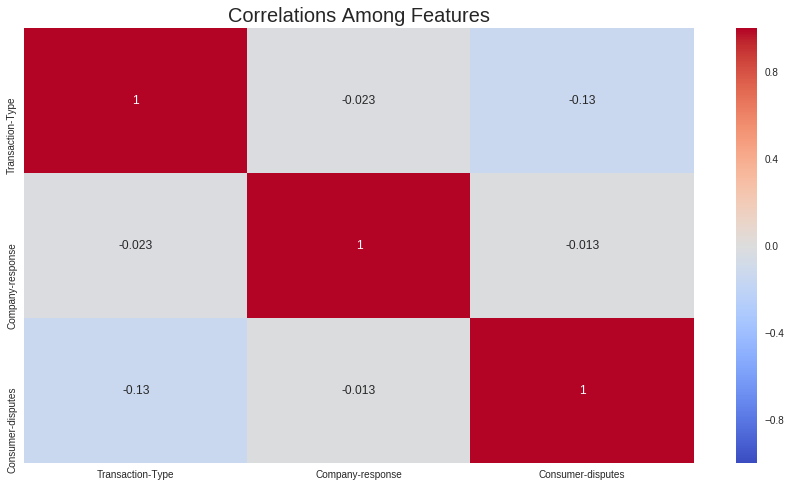

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize = (15,8))
sns.heatmap(cat_train_data.corr(), annot=True,cmap="coolwarm")
plt.title("Correlations Among Features", fontsize = 20);

In [0]:
cor = train_data['Complaint-reason'].value_counts()
cor
len(cor)

150

In [0]:
cor_train = train_data[['Complaint-reason']].copy()
cor_train.ndim

2

In [0]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
cor_train_transformed = ohe.fit_transform(cor_train)
cor_train_transformed

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
cs = train_data['Complaint-Status'].value_counts()
cs
len(cs)

5

In [0]:
cs_train = train_data[['Complaint-Status']].copy()
cs_train.ndim

2

In [0]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
cs_train_transformed = ohe.fit_transform(cs_train)
cs_train_transformed

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [0]:
cat_train_data = train_data.select_dtypes(include=['object']).copy()
cat_train_data['Company-response'] = cr_train_transformed
cat_train_data['Transaction-Type'] = tt_train_transformed
cat_train_data['Consumer-disputes'] = cd_train_transformed
cat_train_data['Complaint-Status'] = cs_train_transformed
cat_train_data['Complaint-reason'] = cor_train_transformed
cat_train_data.head(30)

,Complaint-ID,Date-received,Transaction-Type,Complaint-reason,Company-response,Date-sent-to-company,Complaint-Status,Consumer-disputes
0,Tr-1,11/11/2015,0.0,0.0,0.0,11/11/2015,0.0,1.0
1,Tr-2,7/7/2015,0.0,0.0,0.0,7/7/2015,0.0,0.0
2,Tr-3,5/7/2015,1.0,0.0,0.0,5/7/2015,0.0,0.0
3,Tr-4,11/12/2016,0.0,0.0,0.0,11/12/2016,0.0,0.0
4,Tr-5,9/29/2016,0.0,0.0,0.0,9/29/2016,0.0,0.0
5,Tr-6,8/2/2016,0.0,0.0,0.0,8/3/2016,0.0,0.0
6,Tr-7,3/26/2017,0.0,0.0,0.0,3/26/2017,0.0,0.0
7,Tr-8,10/15/2016,1.0,0.0,0.0,10/15/2016,0.0,0.0
8,Tr-9,1/18/2016,0.0,0.0,0.0,1/18/2016,0.0,0.0
9,Tr-10,8/17/2015,0.0,0.0,0.0,8/17/2015,0.0,0.0


In [0]:
cat_train_data.drop('Date-received',axis=1,inplace=True)
cat_train_data.drop('Date-sent-to-company',axis=1,inplace=True)

In [0]:
cat_train_data.corr()

,Transaction-Type,Complaint-reason,Company-response,Complaint-Status,Consumer-disputes
Transaction-Type,1.000000,-0.018411,-0.022814,0.016778,-0.132901
Complaint-reason,-0.018411,1.000000,-0.005386,-0.008897,-0.029988
Company-response,-0.022814,-0.005386,1.000000,0.009028,-0.012660
Complaint-Status,0.016778,-0.008897,0.009028,1.000000,-0.064223
Consumer-disputes,-0.132901,-0.029988,-0.012660,-0.064223,1.000000


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize = (15,8))
sns.heatmap(cat_train_data.corr(), annot=True,cmap="coolwarm")
plt.title("Correlations Among Features", fontsize = 20);

In [0]:
cat_train_data.head()

,Transaction-Type,Complaint-reason,Company-response,Complaint-Status,Consumer-disputes
Complaint-ID,,,,,
Tr-1,0.0,0.0,0.0,0.0,1.0
Tr-2,0.0,0.0,0.0,0.0,0.0
Tr-3,1.0,0.0,0.0,0.0,0.0
Tr-4,0.0,0.0,0.0,0.0,0.0
Tr-5,0.0,0.0,0.0,0.0,0.0


In [0]:
from zipfile import ZipFile
zip_file = ZipFile('/content/sg-complaint.zip')
test_data=pd.read_csv(zip_file.open('test.csv'))
test_data.head()

,Complaint-ID,Date-received,Transaction-Type,Complaint-reason,Company-response,Date-sent-to-company,Consumer-disputes,Consumer-complaint-summary
0,Te-1,8/18/2016,Bank account or service,"Account opening, closing, or management",Company has responded to the consumer and the ...,8/18/2016,No,XXXX / XXXX / 16 I called Citibank to open a c...
1,Te-2,4/18/2016,Debt collection,Communication tactics,Company believes it acted appropriately as aut...,4/20/2016,No,I'm struggling financially. I called and I off...
2,Te-3,3/23/2016,Credit reporting,Incorrect information on credit report,NaN,3/23/2016,No,"In XXXX of 2015, an automatic payment was conf..."
3,Te-4,6/26/2017,Student loan,Dealing with your lender or servicer,NaN,6/26/2017,NaN,"I submitted a request to XXXX, which is my cur..."
4,Te-5,5/13/2016,Credit reporting,Incorrect information on credit report,Company has responded to the consumer and the ...,5/13/2016,No,A state tax lien was filed against me XXXX / X...


In [0]:
test_data.drop('Consumer-complaint-summary',axis=1,inplace=True)

In [0]:
test_data.isnull().sum()

Complaint-ID               0
Date-received              0
Transaction-Type           0
Complaint-reason           0
Company-response        9701
Date-sent-to-company       0
Consumer-disputes       3304
dtype: int64

In [0]:
tt = test_data['Transaction-Type'].value_counts()
(tt)

Debt collection                                                                 4539
Mortgage                                                                        3324
Credit reporting                                                                2986
Credit card                                                                     1752
Bank account or service                                                         1385
Credit reporting, credit repair services, or other personal consumer reports    1362
Student loan                                                                    1188
Consumer Loan                                                                    860
Credit card or prepaid card                                                      293
Checking or savings account                                                      196
Payday loan                                                                      169
Prepaid card                                                     

In [0]:
tt_test = test_data[['Transaction-Type']].copy()
tt_test.ndim

2

In [0]:
tt_test_transformed = ohe.transform(tt_test)
tt_test_transformed.shape

(18543, 18)

In [0]:
cr = test_data['Company-response'].value_counts()
cr
len(cr)

10

In [0]:
cr_test = test_data[['Company-response']].copy()
cr_test.ndim

2

In [0]:
import numpy as np
cr_test = cr_test.copy()
cr_test.iloc[0, 0] = np.nan
cr_test.head(3)

,Company-response
0,NaN
1,Company believes it acted appropriately as aut...
2,NaN


In [0]:


from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy='constant', fill_value='MISSING')
cr_test_imputed = si.fit_transform(cr_test)
cr_test_imputed

array([['MISSING'],
       ['Company believes it acted appropriately as authorized by contract or law'],
       ['MISSING'],
       ...,
       ['MISSING'],
       ['MISSING'],
       ['Company believes it acted appropriately as authorized by contract or law']],
      dtype=object)

In [0]:
cr_test_transformed = ohe.fit_transform(cr_test_imputed)
cr_test_transformed.shape

(18543, 11)

In [0]:
cd = test_data['Consumer-disputes'].value_counts()
cd
len(cd)

2

In [0]:
cd_test = test_data[['Consumer-disputes']].copy()
cd_test.ndim

2

In [0]:
import numpy as np
cd_test = cd_test.copy()
cd_test.iloc[0, 0] = np.nan
cd_test.head(3)


,Consumer-disputes
0,NaN
1,No
2,No


In [0]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy='constant', fill_value='MISSING')
cd_test_imputed = si.fit_transform(cd_test)
cd_test_imputed

array([['MISSING'],
       ['No'],
       ['No'],
       ...,
       ['Yes'],
       ['No'],
       ['No']], dtype=object)

In [0]:
cd_test_transformed = ohe.fit_transform(cd_test_imputed)
cd_test_transformed.shape

(18543, 3)

In [0]:
cor = test_data['Complaint-reason'].value_counts()
cor
len(cor)

147

In [0]:
cor_test = test_data[['Complaint-reason']].copy()
cor_test.ndim

2

In [0]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
cor_test_transformed = ohe.fit_transform(cor_test)
cor_test_transformed

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
cat_test_data = test_data.select_dtypes(include=['object']).copy()
cat_test_data['Company-response'] = cr_test_transformed
cat_test_data['Transaction-Type'] = tt_test_transformed
cat_test_data['Consumer-disputes'] = cd_test_transformed
#cat_train_data['Complaint-Status'] = cs_train_transformed
cat_test_data['Complaint-reason'] = cor_test_transformed
cat_test_data.tail(30)

,Complaint-ID,Date-received,Transaction-Type,Complaint-reason,Company-response,Date-sent-to-company,Consumer-disputes
18513,Te-18514,2/28/2017,0.0,0.0,0.0,2/28/2017,0.0
18514,Te-18515,12/4/2015,0.0,0.0,0.0,12/9/2015,0.0
18515,Te-18516,1/5/2016,1.0,0.0,0.0,1/5/2016,0.0
18516,Te-18517,1/26/2017,1.0,0.0,0.0,1/26/2017,0.0
18517,Te-18518,4/5/2017,0.0,0.0,0.0,4/5/2017,0.0
18518,Te-18519,7/24/2017,0.0,0.0,0.0,7/24/2017,1.0
18519,Te-18520,5/1/2017,0.0,0.0,0.0,6/14/2017,1.0
18520,Te-18521,11/15/2016,0.0,0.0,0.0,11/15/2016,0.0
18521,Te-18522,8/6/2016,1.0,0.0,0.0,8/6/2016,0.0
18522,Te-18523,8/2/2016,0.0,0.0,0.0,8/2/2016,0.0


In [0]:
cat_test_data.drop('Date-received',axis=1,inplace=True)
cat_test_data.drop('Date-sent-to-company',axis=1,inplace=True)

In [0]:
cat_test_data.set_index('Complaint-ID',inplace=True)

In [0]:
cat_test_data.head()

,Transaction-Type,Complaint-reason,Company-response,Consumer-disputes
Complaint-ID,,,,
Te-1,1.0,0.0,0.0,1.0
Te-2,0.0,0.0,0.0,0.0
Te-3,0.0,0.0,0.0,0.0
Te-4,0.0,0.0,0.0,1.0
Te-5,0.0,0.0,0.0,0.0
